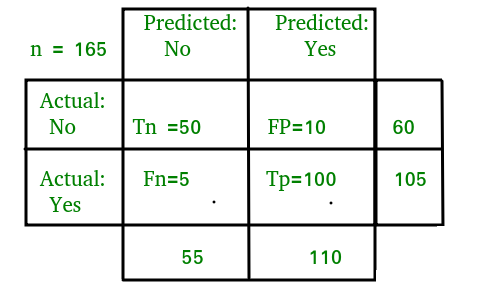

In [ ]:
max_nfrauds = 60
for nfrauds in range(max_nfrauds//2, max_nfrauds):
    print('========== Actual #frauds = %i ==========' % nfrauds)
    for tp in range(max_nfrauds//2, nfrauds):
        print('----- TP = %i -----' % tp)
        fn = nfrauds - tp
        for fp in range(max_nfrauds//2):
            precision = tp / (tp + fp)
            recall    = tp / (tp + fn)
            f1        = 2 * recall * precision / (recall + precision)
            print('%.3f' % f1)   

In [2]:
import numpy  as np
import pandas as pd

$F_1 = \frac{2TP}{2TP + FP + FN}$

In [3]:
df_ETC_9    = pd.read_csv('../submitted/AlBo0808_RFE_ETC_9.csv')
df_ETC_9_80 = pd.read_csv('../submitted/AlBo0808_RFE_ETC_9_80.csv')

set_ETC_9    = set(df_ETC_9['TransactionId'][df_ETC_9['FraudResult']==1].tolist())
set_ETC_9_80 = set(df_ETC_9_80['TransactionId'][df_ETC_9_80['FraudResult']==1].tolist())

print(len(set_ETC_9))
print(len(set_ETC_9_80))
print(np.sort(list(set_ETC_9 - set_ETC_9_80)))
print(np.sort(list(set_ETC_9_80 - set_ETC_9)))
print(np.sort(list(set_ETC_9_80 ^ set_ETC_9)))

81
80
['TransactionId_11374']
[]
['TransactionId_11374']


In [5]:
print(df_ETC_9['FraudResult'][df_ETC_9['TransactionId']=='TransactionId_50600'])

df_ETC_9.at[df_ETC_9['TransactionId'] == 'TransactionId_50600', 'FraudResult'] = 1

print(df_ETC_9['FraudResult'][df_ETC_9['TransactionId']=='TransactionId_50600'])

0    0
Name: FraudResult, dtype: int64
0    1
Name: FraudResult, dtype: int64


In [9]:
from collections import Counter
Counter(df_ETC_9['FraudResult'])

Counter({1: 82, 0: 44937})

In [11]:
df_ETC_9.to_csv('../submitted/AlBo0809_RFE_ETC_9_82.csv', encoding='utf-8', index=False)

In [12]:
df_ETC_9    = pd.read_csv('../submitted/AlBo0808_RFE_ETC_9.csv')
df_ETC_9_82 = pd.read_csv('../submitted/AlBo0809_RFE_ETC_9_82.csv')

set_ETC_9    = set(df_ETC_9   ['TransactionId'][df_ETC_9   ['FraudResult']==1].tolist())
set_ETC_9_82 = set(df_ETC_9_82['TransactionId'][df_ETC_9_82['FraudResult']==1].tolist())

print('ETC_9',      len(set_ETC_9))
print('ETC_9_82', len(set_ETC_9_82))
print(np.sort(list(set_ETC_9    - set_ETC_9_82)))
print(np.sort(list(set_ETC_9_82 - set_ETC_9)))
print(np.sort(list(set_ETC_9_82 ^ set_ETC_9)))

ETC_9 81
ETC_9_82 82
[]
['TransactionId_50600']
['TransactionId_50600']


In [15]:
A = 0.793650793650794 #frauds=81      AlBo0808_RFE_ETC_9.csv
B = 0.774193548387097 #frauds=80 TP-1 AlBo0808_RFE_ETC_9_80.csv
C = 0.78125           #frauds=82 FP+1 AlBo0809_RFE_ETC_9_82.csv

In [16]:
print(2*(A-1))

print(2*(B-1))
print(B-2)

print(2*(C-1))

-0.4126984126984119
-0.45161290322580605
-1.225806451612903
-0.4375
